In [1]:
import mlx.core as mx
import mlx.nn as nn
from mlx.data import datasets

In [2]:
# Load training set
mnist_train = datasets.load_mnist(train=True)

In [3]:
def get_streamed_data(data, batch_size=0, shuffled=True):
    buffer = data.shuffle() if shuffled else data
    stream = buffer.to_stream()
    stream = stream.key_transform("image", lambda x: x.astype("float32"))
    stream = stream.batch(batch_size) if batch_size > 0 else stream
    return stream.prefetch(4, 2)

In [4]:
mnist_trainstream = get_streamed_data(data=mnist_train, batch_size=1, shuffled=True)

batch = next(mnist_trainstream)
X, y = mx.array(batch["image"]), mx.array(batch["label"])

X.shape, y.shape

((1, 28, 28, 1), (1,))

In [5]:
# Create a convolution layer with kernel_size 2x2 and 1 stride
conv2d = nn.Conv2d(
    in_channels=X.shape[-1],
    out_channels=1,
    kernel_size=2,
    padding=0,
    stride=1,
)

res = conv2d(X)
res.shape

(1, 27, 27, 1)

In [6]:
# Calculating output dimension of a Conv2d layer
def get_convolution_output_dim(width, stride, kernel_size, padding):
    """
    Assuming that the input image has dimension of width x width (square image).
    We only need the width in this case
    """ 
    return ((width - kernel_size + (2 * padding)) / stride) + 1

output_dim = get_convolution_output_dim(X.shape[1], 1, 2, 0)
print(f"Output image: {output_dim} x {output_dim}")

stride = 2
padding = 0
kernel_size = 2

output_dim = get_convolution_output_dim(X.shape[1], stride, kernel_size, padding)
print(f"Output image: {output_dim} x {output_dim}")

Output image: 27.0 x 27.0
Output image: 14.0 x 14.0


In [7]:
# Pooling layer
pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
output = pool2d(res)
output.shape

(1, 13, 13, 1)

In [8]:
def get_pooling_layer_out_dim(width, height, stride, kernel_size, padding):
    """
    Assuming that stride and kernel is a square (e.g., 2x2)
    """
    w_out = ((width + 2 * padding - kernel_size) / stride) + 1
    h_out = ((height + 2 * padding - kernel_size) / stride) + 1
    return int(w_out), int(h_out)

w_out, h_out = get_pooling_layer_out_dim(X.shape[1], X.shape[1], stride, kernel_size, padding)
print(f"Pooling layer output w x h -> {w_out} x {h_out}")

w_out, h_out = get_pooling_layer_out_dim(res.shape[1], res.shape[1], stride, kernel_size, padding)
print(f"Pooling layer output w x h -> {w_out} x {h_out}")


Pooling layer output w x h -> 14 x 14
Pooling layer output w x h -> 13 x 13


In [9]:
conv_layer1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2)
)

out = conv_layer1(X)
out.shape

(1, 13, 13, 16)

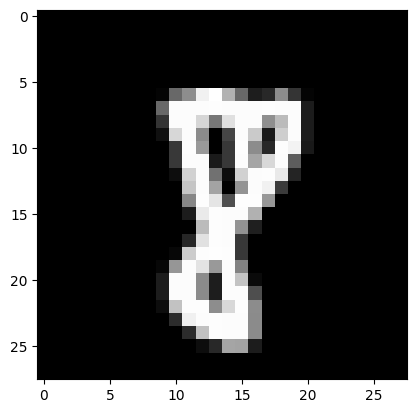

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X.squeeze(), cmap="gray")

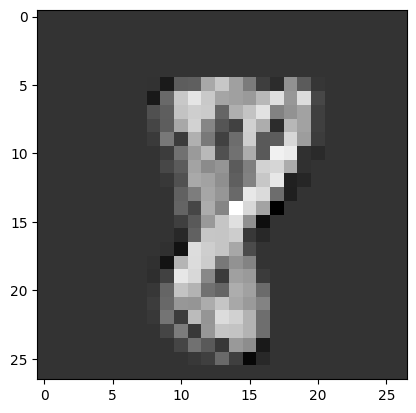

In [11]:
# Visualize Conv2d
conv2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2)
X = conv2(X)

plt.imshow(X.squeeze(), cmap="gray")

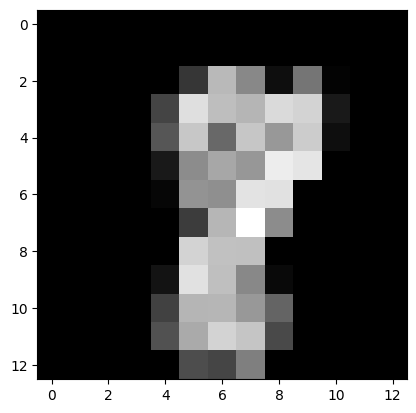

In [12]:
# Visualize MaxPool2d
maxpool = nn.MaxPool2d(kernel_size=2)
X = maxpool(X)

plt.imshow(X.squeeze(), cmap="gray")

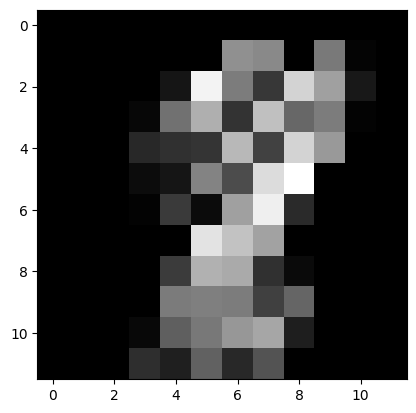

In [13]:
# Visualize Conv2d -> ReLU
X = conv2(X)
X = nn.ReLU()(X)
plt.imshow(X.squeeze(), cmap="gray")